<a href="https://colab.research.google.com/github/swathi-manda/Sensor-target/blob/main/5_weak_sensors_to_classify_20_targets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let the matrix of dissociation constants of target-sensor pairs be D. It is of 
size [m x n] where m is the number of targets and n is the number of sensing 
elements. Each row is the fingerprint of a single target as assessed by n weak 
binding sensing elements. Each element of the dissociation matrix 
**D(i,j)= log (K_D)** where K_D values are in uM with a range in between 
**[0.1 uM, 1 mM]** since we are interested only in the weak binders 
(Kastritis et. al, Protein Science, 2011). High the K_D, weaker the binder.

K_D values are based on free energies of binding. Assume a **normal distribution ** of log(K_D) values within the range - since they are achievable through careful design of sensing elements. For example sequential aptamer binding, the binders are engineered to have varying affinities due to base and length modifications of aptamers.

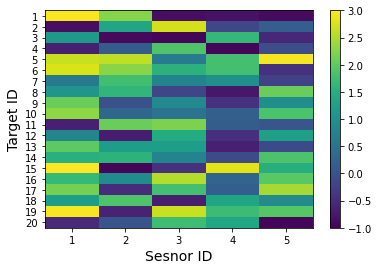

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import cauchy
from google.colab import files

np.random.seed(19680702)
l_limit = -1
u_limit = 3
m = 20
n = 5

# D is the true log dissociation matrix where D(i,j)= log (K_D), for K_D values in uM
D = np.random.uniform(l_limit, u_limit, (m,n))

centers = [1,n,m,1]
dx, = np.diff(centers[:2])/(D.shape[1]-1)
dy, = -np.diff(centers[2:])/(D.shape[0]-1)
extent = [centers[0]-dx/2, centers[1]+dx/2, centers[2]+dy/2, centers[3]-dy/2]

# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'DejaVu Sans', 'size':'14', 'color':'black', 'weight':'normal'} # Bottom vertical alignment for more space
axis_font = {'fontname':'DejaVu Sans', 'size':'14'}

plt.imshow(D, cmap = 'viridis', interpolation=None, extent=extent, aspect='auto', vmin = l_limit, vmax = u_limit)
plt.xticks(np.arange(centers[0], centers[1]+dx, dx))
plt.yticks(np.arange(centers[3], centers[2]+dy, dy))

plt.grid(False)
plt.xlabel('Sesnor ID', **axis_font)
plt.ylabel('Target ID', **axis_font)
plt.colorbar()
plt.show()





Assume that the system has some noise in measurement and that
the D values have some variability in multiple readouts. This variability can be
assumed to be normally distributed, centered around the D value with some 
chosen spread. In this case, we assume a gaussian spread of about 30 % the value.

We evaluate if given a new solution with unknown mixture of targets(D_u), 
can we accurately classify them with a small set of sensors?



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

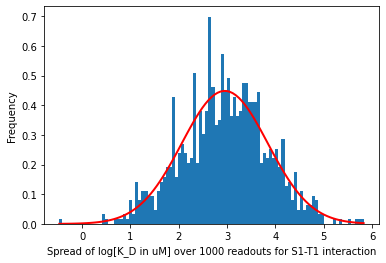

In [ ]:
#So, first, we model the noisy values of D (D_n) based on reference values (D)'''
stddev_factor = 0.3
np.random.seed(19680702)

# Assigning Gaussian noise to the D values
D_stddev = abs(D*stddev_factor)

# generating 1000 instances of normally distributed unknown matrices per the 
# given mean (D) and std dev. (D_stddev) contributed by the Gaussian noise
n_readouts = 1000
D_iter = np.tile(D,(1000,1))
D_stddev_iter = np.tile(D_stddev,(1000,1))
D_n_iter = np.random.normal(D_iter, D_stddev_iter)


# Plotting an example Target-Sensor distribution of the 1000 readouts
#np.shape(D_n_iter)
subArray = D_n_iter[0:m*n_readouts:m]

import matplotlib.pyplot as plt
from scipy.stats import norm
count, bins, ignored = plt.hist(subArray[:,0], 100, density=True)
mu, sigma = norm.fit(subArray[:,0])
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.xlabel("Spread of log[K_D in uM] over 1000 readouts for S1-T1 interaction")
plt.ylabel("Frequency")

# Save & display the image
plt.savefig('Spread of noisy log-dissociation values.eps', bbox_inches="tight")
files.download('Spread of noisy log-dissociation values.eps')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

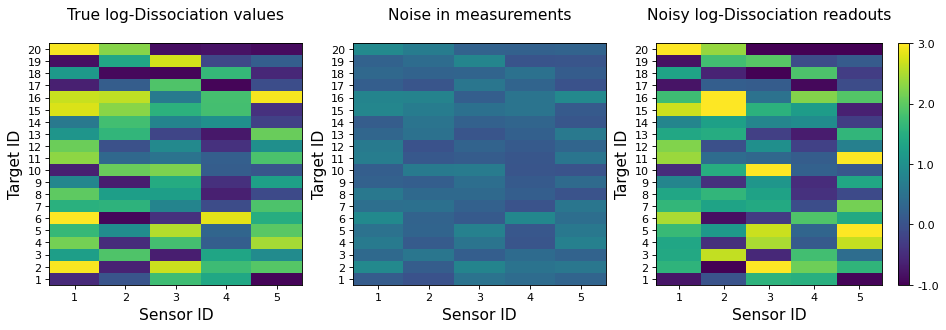

In [ ]:
'''Visualizing an instance of noisy D_n values that were modeled based on true D values'''

# D_n_iter visualization
D_n = np.vsplit(D_n_iter, n_readouts)

def make_colorbar_with_padding(ax):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.2)
    return(cax) 


centers = [1,n,1,m]
dx, = np.diff(centers[:2])/(D.shape[1]-1)
dy, = -np.diff(centers[2:])/(D.shape[0]-1)
extent = [centers[0]-dx/2, centers[1]+dx/2, centers[2]+dy/2, centers[3]-dy/2]

fig = plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
ax1=fig.add_subplot(131)
plt.imshow(D, cmap = 'viridis', interpolation=None, extent=extent, aspect='auto',vmin = l_limit, vmax = u_limit)
plt.xticks(np.arange(centers[0], centers[1]+dx, dx))
plt.yticks(np.arange(centers[3], centers[2]+dy, dy))
plt.title("True log-Dissociation values\n", **title_font)
plt.xlabel("Sensor ID", **axis_font)
plt.ylabel("Target ID", **axis_font)
plt.grid(False)


#2 # shift subplots to the right to make space for the colorbars using the function [subplots_adjust()]
fig.subplots_adjust(right=2)
ax2=fig.add_subplot(132)
plt.imshow(D_stddev,cmap = 'viridis', interpolation=None, extent=extent, aspect='auto', vmin = l_limit, vmax = u_limit)
plt.xticks(np.arange(centers[0], centers[1]+dx, dx))
plt.yticks(np.arange(centers[3], centers[2]+dy, dy))
plt.title("Noise in measurements\n", **title_font)
plt.xlabel("Sensor ID", **axis_font)
plt.ylabel("Target ID", **axis_font)
plt.grid(False)


fig.subplots_adjust(right=1.2)
ax3=fig.add_subplot(133)
plt.imshow(D_n[0], cmap = 'viridis',interpolation=None, extent=extent, aspect='auto', vmin = l_limit, vmax = u_limit)
plt.xticks(np.arange(centers[0], centers[1]+dx, dx))
plt.yticks(np.arange(centers[3], centers[2]+dy, dy))
plt.title("Noisy log-Dissociation readouts\n", **title_font)
plt.xlabel("Sensor ID", **axis_font)
plt.ylabel("Target ID", **axis_font)
plt.grid(False)

# add a colorbar within its own axis the same size as the image plot
cax3=make_colorbar_with_padding(ax3) 
cbar = plt.colorbar(cax=cax3,format = '%.1f')
cbar.set_ticks([-1.0,0,1.0,2.0,3.0])

# Save & display the image
plt.savefig('Log-dissociation values.eps', bbox_inches="tight")
files.download('Log-dissociation values.eps')
plt.show()


Visualizing more instances of noisy D_n values. Various instances are taken
from a normal distribution centred around D values with a specific spread.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

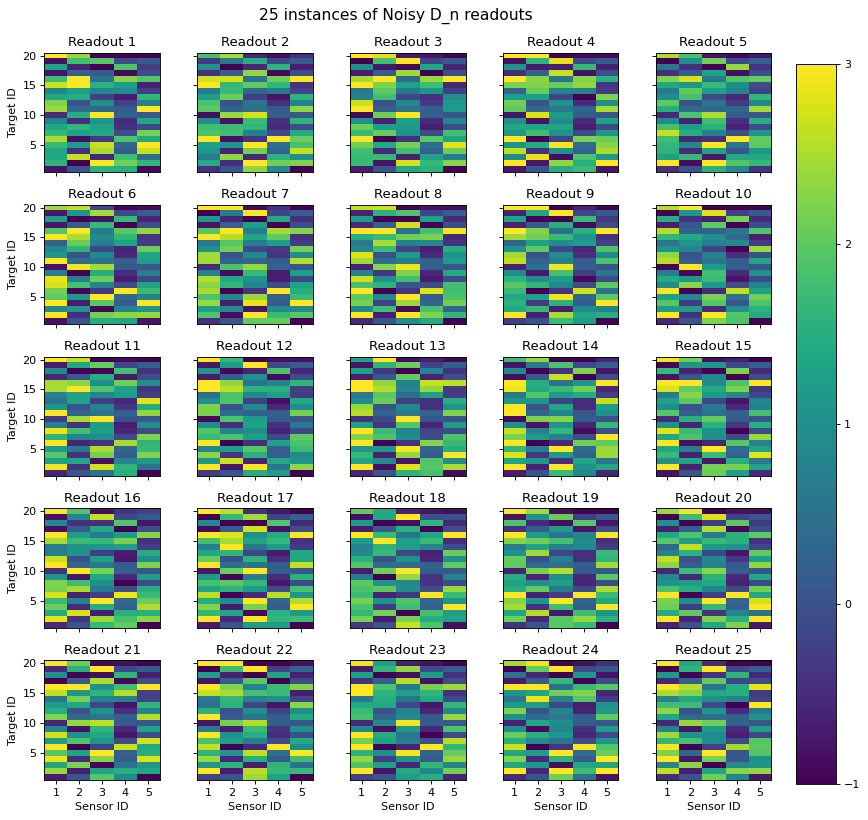

In [ ]:

# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'DejaVu Sans', 'size':'14', 'color':'black', 'weight':'normal'} # Bottom vertical alignment for more space
axis_font = {'fontname':'DejaVu Sans', 'size':'14'}

def make_colorbar_with_padding_1(ax):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="10%", pad=0.1)
    return(cax) 

# find minimum of minima & maximum of maxima
min_D_n = np.min(D_n[0:25])
max_D_n = np.max(D_n[0:25])

fig = plt.figure(figsize=[10,10],  dpi=80, facecolor='w', edgecolor='k')
axs = fig.subplots(5, 5, sharex = True, sharey = True)
images = [D_n[_] for _ in range(25)]
for i, ax in enumerate(axs.flatten()):
         img = ax.imshow(images[i], cmap = 'viridis', interpolation=None, extent=extent, aspect='auto', vmin = l_limit, vmax = u_limit)
         plt.xticks([1,2,3,4,5])
         plt.yticks([5,10,15,20])
         plt.grid(False)      
         ax.set_title("Readout " + str(i+1))
         ax.grid(False)

# adjust subplots and add a common colorbar
fig.subplots_adjust(right=0.5)
cbar_ax = fig.add_axes([1, 0.05, 0.05, 0.9])
cbar = fig.colorbar(img, cax=cbar_ax, pad = 0.3)
cbar.set_ticks([-1,0,1,2,3])

plt.setp(axs[-1, :], xlabel="Sensor ID")
plt.setp(axs[:, 0], ylabel='Target ID')
fig.suptitle('25 instances of Noisy D_n readouts', y=1.02, **title_font)
fig.tight_layout()


# Save & display the image
plt.savefig('25 instances of Noisy D_n readouts.eps', bbox_inches="tight")
files.download('25 instances of Noisy D_n readouts.eps')
plt.show()


Machine Learning Algorithm to accurately classify the targets within a mixture based on their signatures of interaction with the sensors. With the help of a k-Nearest Neighbor (kNN) supervised classification, targets that show similar signatures in the multi-dimensional space of sensors are classified. Some questions that this analysis answers are, how accurately can the targets be classified 

*   in the presence of noise
*   in the instance of similarity in the signatures - how close can the true dissociation constants get?
*   in presence of a large variety of targets in a mixture
*   in presence of a large dynamic range within weak interactions

Here 80% of the data points from a set of 1000 readouts are used as the training set and accuracy was tested on remaining 20% of the data points.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

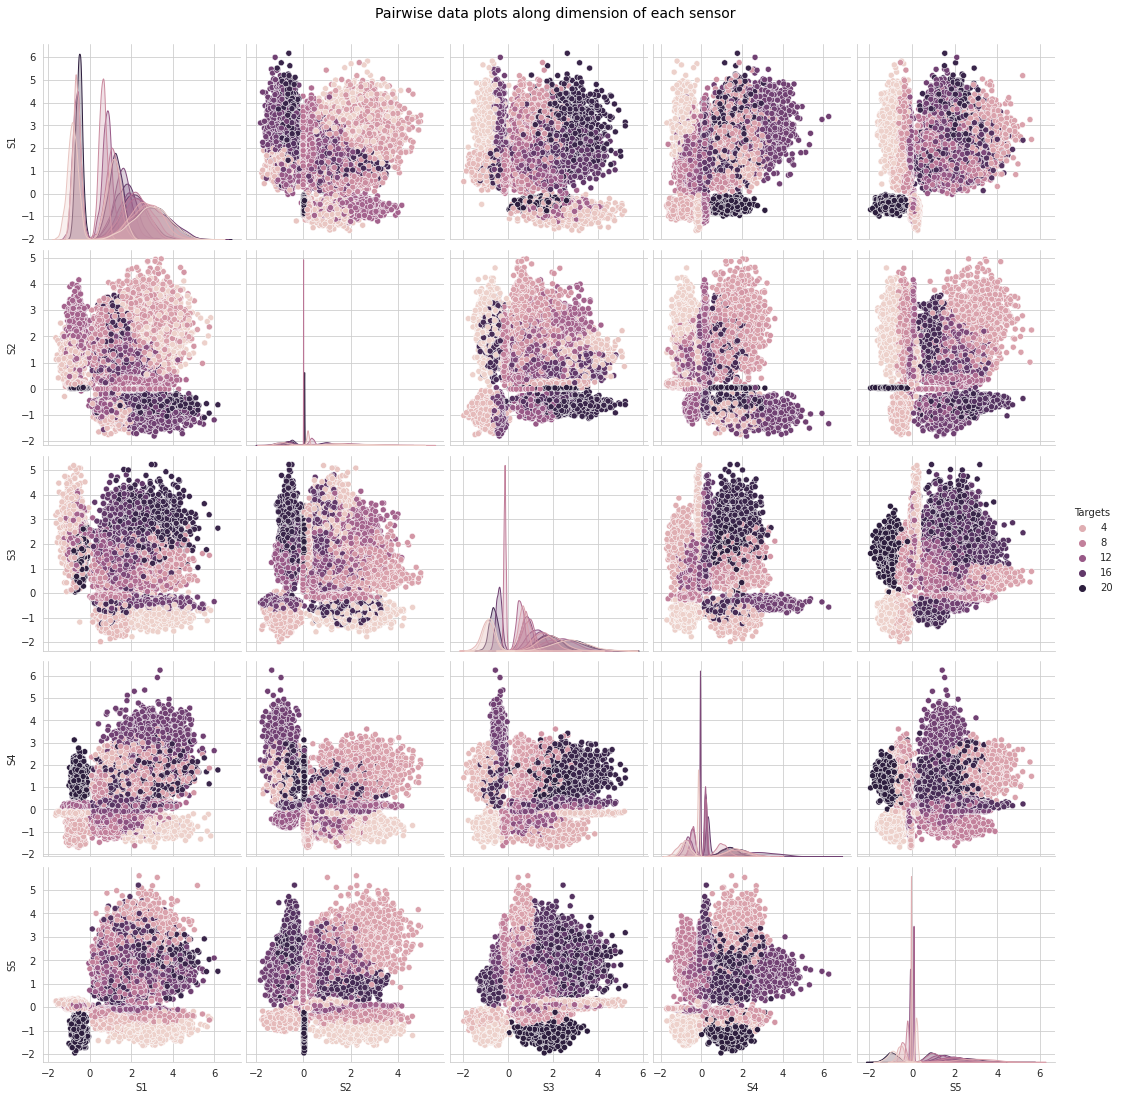

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

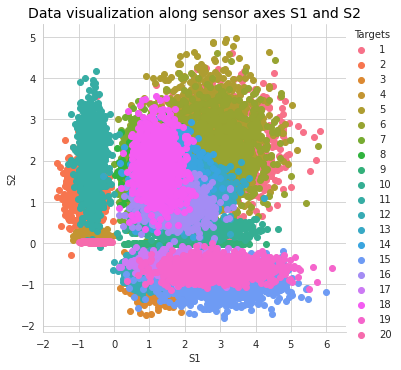

In [ ]:
'''DATA PREP & Exploratory Data Analysis'''

# The data is already stored in D_n_iter variable, however we need to preprocess
# it to prepare for machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# get length of data frame columns
num_cols = n+1

# Generate the new column names for data frame
new_cols = ['S' + str(i) for i in range(1,num_cols)]

# Create dataset
df1 = pd.DataFrame(D_n_iter, columns = new_cols)
df1.insert(0,'Targets',np.tile(range(1,m+1),n_readouts))

# Data visualization
plt.close()
sns.set_style("whitegrid");
g = sns.pairplot(df1, hue="Targets", height=3, diag_kind="kde");
g.fig.suptitle('Pairwise data plots along dimension of each sensor', y=1.02, **title_font)

# Save & display the image
plt.savefig('Pairwise data plots along dimension of each sensor.eps', bbox_inches="tight")
files.download('Pairwise data plots along dimension of each sensor.eps')
plt.show()

# Closer look - example of the signatures of targets along the dimensions of 
# sensors S1 and S2
sns.set_style("whitegrid");
f = sns.FacetGrid(df1, hue="Targets", size=5) \
.map(plt.scatter, "S1", "S2") \
.add_legend();
f.fig.suptitle('Data visualization along sensor axes S1 and S2', y=1.02, **title_font)

# Save & display the image
plt.savefig('Data visualization along sensor axes S1 and S2.eps', bbox_inches="tight")
files.download('Data visualization along sensor axes S1 and S2.eps')
plt.show()


In [ ]:
# 3-D visualization of the target-sensor signature data along the 3 dimensions of
# sensors S1, S2 and S3
import plotly.express as px

#df2 = px.data.gapminder()
fig = px.scatter_3d(df1, x='S1', y='S2', z='S3', color='Targets', hover_name='Targets')
fig.show()
# Here it is observed that targets 2 (blue) and 12 (fuschia) are clearly spatially separated, however 
# targets  2 (blue) and 20 (yellow) are not

#df2 = px.data.gapminder()
fig = px.scatter_3d(df1, x='S3', y='S4', z='S5', color='Targets', hover_name='Targets' )
fig.show()
# Here it is obseved that targets 2 (blue) and 20 (yellow) are clearly spatially separated along the 
# dimensions of S3, S4 and S5

Data Normalization for feeding to the classifier algorithm

In [ ]:
x_data = df1.drop(["Targets"],axis=1)
y_data = df1["Targets"]
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=new_cols)
data.head(m)


S1        S2        S3        S4        S5
0   0.665553  0.617373  0.131863  0.084296  0.125037
1   0.102278  0.531985  0.546046  0.204410  0.278048
2   0.378254  0.177810  0.112927  0.449721  0.220692
3   0.106264  0.295437  0.296137  0.098848  0.248095
4   0.433463  0.723911  0.344626  0.496903  0.512339
5   0.553745  0.736241  0.491817  0.364923  0.173955
6   0.313461  0.454367  0.390935  0.333170  0.222006
7   0.387265  0.485118  0.240460  0.126414  0.473088
8   0.495144  0.264996  0.411820  0.185345  0.354999
9   0.516252  0.327899  0.319890  0.235351  0.658234
10  0.144742  0.488352  0.721504  0.243190  0.269598
11  0.313693  0.202825  0.426661  0.152479  0.441243
12  0.383223  0.509201  0.455148  0.159397  0.243379
13  0.419570  0.461626  0.472817  0.206204  0.544541
14  0.527979  0.144978  0.230279  0.452112  0.446530
15  0.426269  0.436375  0.645439  0.252643  0.683998
16  0.383249  0.199503  0.619022  0.231136  0.608583
17  0.388724  0.656675  0.199801  0.438343  0.313995
18  0.414504  0.099941  0.773319  0.479399  0.471822
19  0.108370  0.271796  0.493889  0.404035  0.133071

In [ ]:
'''Training the classifier'''

X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 1)
knn_clf = KNeighborsClassifier(weights='uniform')
knn_clf.fit(X_train,y_train)


KNeighborsClassifier()

In [ ]:
#Predicted output values
ypred=knn_clf.predict(X_test) 

Classification Report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00       203
           2       0.97      0.98      0.98       192
           3       1.00      1.00      1.00       197
           4       1.00      1.00      1.00       200
           5       1.00      0.99      1.00       225
           6       0.99      0.99      0.99       192
           7       0.99      1.00      0.99       181
           8       1.00      1.00      1.00       176
           9       1.00      1.00      1.00       199
          10       0.96      1.00      0.98       194
          11       0.99      0.97      0.98       215
          12       0.99      1.00      1.00       205
          13       0.99      0.99      0.99       196
          14       0.95      0.97      0.96       200
          15       1.00      1.00      1.00       210
          16       1.00      0.94      0.97       220
          17       0.99      0.99      0.99       203
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

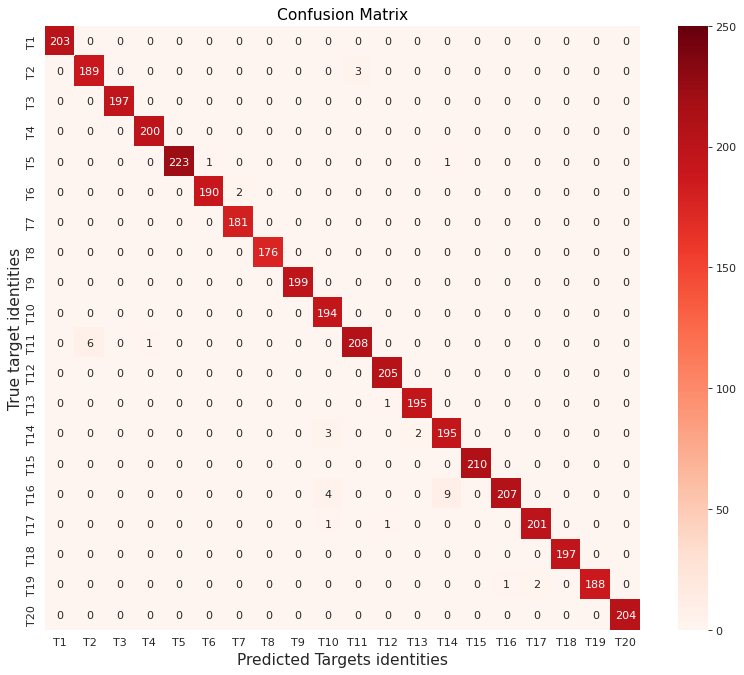

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt     
from matplotlib.pyplot import figure



result1 = classification_report(y_test, ypred)
print("Classification Report:",result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)


result = confusion_matrix(y_test, ypred)

title_font = {'fontname':'DejaVu Sans', 'size':'14', 'color':'black', 'weight':'normal'} # Bottom vertical alignment for more space
axis_font = {'fontname':'DejaVu Sans', 'size':'14'}

figure(figsize=(12, 10), dpi=80)
ax= plt.subplot()
sns.heatmap(result, annot=True, fmt='d', ax=ax, cmap = 'Reds',vmin=0, vmax=250 );  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted Targets identities', **axis_font);
ax.set_ylabel('True target identities', **axis_font); 
ax.set_title('Confusion Matrix', **title_font); 
ax.xaxis.set_ticklabels(['T1', 'T2', 'T3','T4','T5','T6','T7','T8', 'T9', 'T10','T11','T12',
                         'T13','T14', 'T15', 'T16', 'T17','T18','T19','T20']); 
ax.yaxis.set_ticklabels(['T1', 'T2', 'T3','T4','T5','T6','T7','T8', 'T9',
                          'T10','T11','T12','T13','T14', 'T15', 'T16', 'T17',
                          'T18','T19','T20']);

plt.savefig('Confusion matrix for 20 targets.eps', bbox_inches="tight")
files.download('Confusion matrix for 20 targets.eps')
plt.show()